# Exploração de um espaço 2D gerado por uma rede neural

1. O modelo abaixo possui uma camada linear "gargalo" (bottleneck), possuindo apenas 2 atributos;
2. Pelo fato de possuir 2 atributos, é possível visualizar as ativações em um gráfico 2D após o treinamento do modelo;
3. Treine o modelo no dataset MNIST (no mínimo 1000 imagens). É possível chegar a uma acurácia de ~80% no conjunto de treinamento (não de validação) com o modelo;
3. Analise as propriedades desse espaço 2D para as imagens de treinamento. Quais imagens se localizam em cada um dos 4 cantos? (superior esquerdo, superior direito, etc). É possível interpretar o significado do eixo x e y? Quais classes ficam mais separadas das demais?

Modelo

In [3]:
import torch
from torch import nn

class Model(nn.Module):
    '''Modelo para classificação de dígitos.'''
    def __init__(self):
        super().__init__()

        self.convs = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=2)
        )
        
        self.pool = nn.AdaptiveMaxPool2d(1)
        self.fc1 = nn.Linear(16, 2)
        self.fc2 = nn.Linear(2, 10)

    def forward(self, x):
        x = self.convs(x)
        x = self.pool(x)
        # Transformação do tensor de tamanho bs x 10 x 1 x 1 para bs x 10
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x
    
model = Model()

Exemplo de extração de atributos usando o modelo

In [5]:
model.eval()
model.fc2 = nn.Identity()

# 200 imagens
x = torch.rand(200, 1, 28, 28)
with torch.no_grad():
    scores = model(x)
# 2 atributos extraídos de cada imagem
scores.shape

torch.Size([200, 2])

Exemplo de atributos extraídos do MNIST:

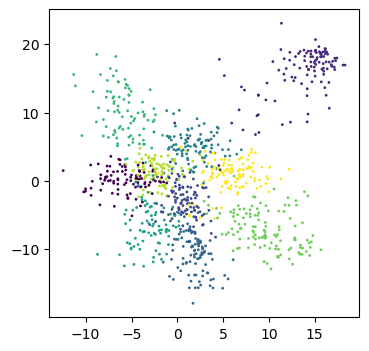